# Week 10 Seminar Answers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

## Question 1

In [2]:
def newton_vol_put(S, K, T, P, r, q):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #P: Put value
    #r: risk free rate
    #q: dividend yield
   
    MAX_ITERATIONS = 100
    tolerance = 0.0001
    
    sigma = 0.25
    
    for i in range(0, MAX_ITERATIONS):
        d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        d2 = (np.log(S / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        price = - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
        vega = S * np.sqrt(T) * si.norm.pdf(d1, 0.0, 1.0)

        diff = P - price

        if (abs(diff) < tolerance):
            return sigma
        else: 
            sigma = sigma + diff/vega
        
        print(i,sigma,diff)
        
    return sigma

## Question 2

In [3]:
impvol = newton_vol_put(120, 120, 1/12, 5, 0.0084, 0.0070)
print('The implied volatility is', round(impvol*100,2) , '% for the one-month call with strike $ 120' ) 

0 0.3626010649518191 1.5550148532687018
1 0.36270470292046625 0.0014302079141117474
The implied volatility is 36.27 % for the one-month call with strike $ 120


## Question 3

In [4]:
AAPL = yf.Ticker("AAPL")
opt = AAPL.option_chain('2020-12-31')
opt.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL201231P00085000,2020-11-27 17:28:58,85.0,0.12,0.0,0.0,0.0,0.0,25.0,0,0.250007,False,REGULAR,USD
1,AAPL201231P00090000,2020-11-27 17:43:37,90.0,0.18,0.0,0.0,0.0,0.0,5.0,0,0.250007,False,REGULAR,USD
2,AAPL201231P00095000,2020-11-27 17:56:21,95.0,0.26,0.0,0.0,0.0,0.0,38.0,0,0.125009,False,REGULAR,USD
3,AAPL201231P00100000,2020-11-27 17:13:02,100.0,0.43,0.0,0.0,0.0,0.0,89.0,0,0.125009,False,REGULAR,USD
4,AAPL201231P00105000,2020-11-27 17:55:50,105.0,0.85,0.0,0.0,0.0,0.0,93.0,0,0.062509,False,REGULAR,USD
5,AAPL201231P00106000,2020-11-27 17:30:36,106.0,0.97,0.0,0.0,0.0,0.0,19.0,0,0.062509,False,REGULAR,USD
6,AAPL201231P00107000,2020-11-27 17:56:59,107.0,1.11,0.0,0.0,0.0,0.0,84.0,0,0.062509,False,REGULAR,USD
7,AAPL201231P00108000,2020-11-27 17:59:27,108.0,1.29,0.0,0.0,0.0,0.0,34.0,0,0.062509,False,REGULAR,USD
8,AAPL201231P00109000,2020-11-27 17:44:08,109.0,1.53,0.0,0.0,0.0,0.0,191.0,0,0.062509,False,REGULAR,USD
9,AAPL201231P00110000,2020-11-27 17:31:48,110.0,1.75,0.0,0.0,0.0,0.0,581.0,0,0.062509,False,REGULAR,USD


In [5]:
import mibian

In [6]:
impliedvol = np.zeros((len(opt.puts.strike),1))
for i in range(len(opt.puts.strike)):
    p = mibian.Me([117, opt.puts.strike[i], 0.89, 0.7, 31], putPrice = opt.puts.lastPrice[i])
    impliedvol [i] = p.impliedVolatility

Text(0.5, 1.0, 'Volatility Smile')

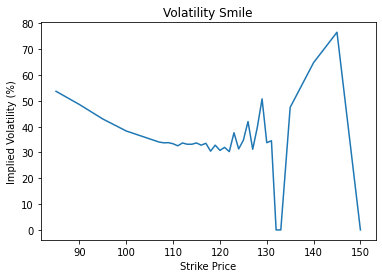

In [7]:
fig = plt.figure()
plt.plot(opt.puts.strike, impliedvol, '-')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility (%)')
plt.title('Volatility Smile')

## Quetion 4

Text(0.5, 1.0, 'Volatility Smile')

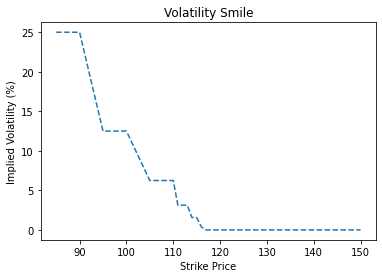

In [8]:
fig = plt.figure()
plt.plot(opt.puts.strike, opt.puts.impliedVolatility*100, '--')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility (%)')
plt.title('Volatility Smile')

## Question 5

In [9]:
difference = np.zeros((len(opt.puts.strike),1))
for i in range(len(opt.puts.strike)):
    difference[i] = impliedvol[i] - opt.puts.impliedVolatility[i]*100

Text(0.5, 1.0, 'Difference')

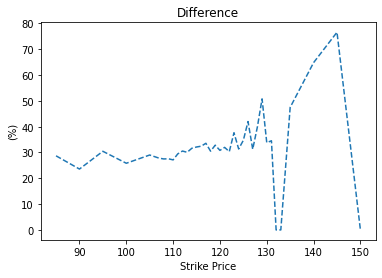

In [10]:
fig = plt.figure()
plt.plot(opt.puts.strike, difference, '--')
plt.xlabel('Strike Price')
plt.ylabel('(%)')
plt.title('Difference')

## Question 6

In [11]:
import arrow
T = ['2020-12-04','2020-12-11','2020-12-18','2020-12-24','2020-12-31',
     '2021-01-15','2021-02-19','2021-03-19','2021-04-16','2021-06-18',
     '2021-07-16','2021-09-17','2022-01-21','2022-06-17','2022-09-16','2023-01-20']

In [12]:
K = [95,100,105,110,115,120,125]
now = arrow.get('2020-11-30')
days = np.zeros((len(T),1))
impliedvol_s = np.zeros((len(K),len(days)))
for j in range(len(days)):
    for i in range(len(K)):
        opt = AAPL.option_chain(T[j])
        temp = arrow.get(T[j])
        delta = temp - now
        days[j] = delta.days
        impliedvol_s [i,j] = opt.puts.impliedVolatility[opt.puts.strike == K[i]]

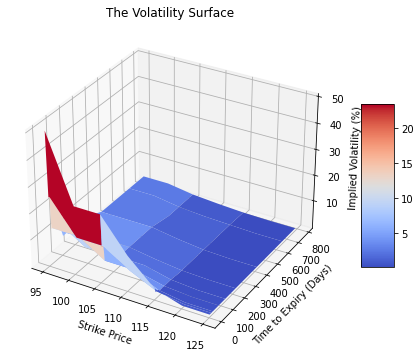

In [13]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
K, days = np.meshgrid(K, days)
surf = ax.plot_surface(K, days, impliedvol_s.T*100, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Strike Price')
ax.set_ylabel('Time to Expiry (Days)')
ax.set_zlabel('Implied Volatility (%)')
plt.title('The Volatility Surface')
fig.colorbar(surf, shrink=0.5, aspect=5);